In [720]:
#Importing Libraries
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
#import re regular expression
from textblob import TextBlob
import string
import preprocessor as p
import os
from searchtweets import ResultStream, gen_rule_payload, load_credentials, collect_results
from tweet_parser.getter_methods.tweet_geo import get_geo_coordinates

In [2]:
#Twitter credentials for the app to hit the twitter API's to fetch the data
premium_search_args = load_credentials("/Users/Sudhan/Desktop/699project/twitter_keys.yaml",
                                       yaml_key="search_tweets_30days_dev",
                                       env_overwrite=False)
print(premium_search_args)


/anaconda3/lib/python3.6/site-packages/searchtweets/credentials.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  search_creds = yaml.load(f)[yaml_key]
Grabbing bearer token from OAUTH


{'bearer_token': 'AAAAAAAAAAAAAAAAAAAAAIgs%2FQAAAAAAYf25gg053eYOFGPGTb5a0oWZhpU%3DFDXnlHS0XIgk7U7ImuqwfWfFke1X8auM7vPiBWEkOMNhj3zz8U', 'endpoint': 'https://api.twitter.com/1.1/tweets/search/30day/dev30.json', 'extra_headers_dict': None}


In [5]:
#Twitter credentials for the app
#consumer_key = '7Ur6tyNmSK2eBJNpAuzabegPX'
#consumer_secret = 'vZ9GgMfORDMlRmkRZ8yRddhRGB0DeR13v4ObYjZrDKjUYT20dc'
#access_key= '911274918-bB0T9QcaI5U1isShZHoHxndX7gMvue7OeXugOxIn'
#access_secret = '8UX6d5V6c6mz8xdhV3eg5JbSittLasAkG5PwVxMcpyubv'

In [6]:
#pass twitter credentials to tweepy
#import tweepy
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_key, access_secret)
#api = tweepy.API(auth)

In [721]:
#import tweepy
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_key, access_secret)
#api = tweepy.API(auth,wait_on_rate_limit=True)
#####United Airlines
# Open/Create a file to append data
#csvFile = open('me_too31.csv', 'a')
#Use csv Writer
#csvWriter = csv.writer(csvFile)

#for tweet in tweepy.Cursor(api.search,q="#metoo",count=10,
#                           lang="en",
                           #from_date="2017-10-15",
#                           since_id="2018-10-17").items():
#                           #to_date="2017-10-17").items():
#    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])


In [3]:
rule = gen_rule_payload(from_date="2019-07-15", #UTC 2017-09-01 00:00
                        to_date="2019-07-31", 
                        pt_rule="#metoo lang:en ")
print(rule)

{"query": "#metoo lang:en", "toDate": "201907310000", "fromDate": "201907150000"}


In [4]:
tweets = collect_results(rule,
                         max_results=500,
                         result_stream_args=premium_search_args)

In [5]:
tweets

[{'created_at': 'Tue Jul 30 23:59:58 +0000 2019',
  'id': 1156353775465930753,
  'id_str': '1156353775465930753',
  'text': 'RT @JnnySchlmrch: Again #WhiteWednesday All the brave Iranian Women who are stepping up are real heroines ✊  #mystealthyfreedom #IranUprisi…',
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'truncated': False,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 81030061,
   'id_str': '81030061',
   'name': 'T.N.C. Global',
   'screen_name': 'Cye1962',
   'location': 'United States',
   'url': None,
   'description': 'Worldwide Breaking News & Sports Highlights!',
   'translator_type': 'none',
   'protected': False,
   'verified': False,
   'followers_count': 310,
   'friends_count': 4691,
   'listed_count': 0,
   'favourites_count': 347,
   'statuses_count': 28998,
   'created_at': 'Fri O

In [692]:
[print(tweet.created_at_string, tweet.all_text, tweet.profile_location, tweet.hashtags,tweet.generator.get("name"),tweet.geo_coordinates,tweet.most_unrolled_urls, end='\n\n') for tweet in tweets[0:1]];

2019-07-30T23:59:58.000Z Again #WhiteWednesday All the brave Iranian Women who are stepping up are real heroines ✊  #mystealthyfreedom #IranUprising #Iran #WhiteWednesdays #womenUnite #Feminism #Kopftuch #MeToo ⁠#MeTwo #hijab #GirlsOfRevolutionStreet #WalkingUnveiled #NoForcedHijab #NoCompulsoryHijab https://t.co/MdkPg2yqhC None ['WhiteWednesday', 'mystealthyfreedom'] Twitter Web App None ['https://twitter.com/i/web/status/1136292326115069952']



In [7]:
#Reading list 
import pickle

with open('outfile', 'wb') as fp:
    pickle.dump(tweets, fp)
    
#read
with open ('outfile', 'rb') as fp:
    tweets_read = pickle.load(fp)

In [718]:
#Sample view of tweet after reading
print(tweets_read[1])

{'created_at': 'Tue Jul 30 23:59:50 +0000 2019', 'id': 1156353742008201217, 'id_str': '1156353742008201217', 'text': '@balloffire11 me, too #MeToo', 'display_text_range': [14, 28], 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': 1156352504201994248, 'in_reply_to_status_id_str': '1156352504201994248', 'in_reply_to_user_id': 1007765673307754504, 'in_reply_to_user_id_str': '1007765673307754504', 'in_reply_to_screen_name': 'balloffire11', 'user': {'id': 1072885932121092102, 'id_str': '1072885932121092102', 'name': 'sara smirks', 'screen_name': 'SaraSmirks', 'location': 'florida gulf coast', 'url': None, 'description': 'retired science writer/communications pro. wife. mom. sailor. reader. many years in dc and overseas. to the evil now in power- take your fresh hell and shove it', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 69, 'friends_count': 127, 'listed_count': 0, 'f

In [11]:
#pre_processing = tweets_read


In [12]:
#pre_processing[0]

{'created_at': 'Tue Jul 30 23:59:58 +0000 2019',
 'id': 1156353775465930753,
 'id_str': '1156353775465930753',
 'text': 'RT @JnnySchlmrch: Again #WhiteWednesday All the brave Iranian Women who are stepping up are real heroines ✊  #mystealthyfreedom #IranUprisi…',
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 81030061,
  'id_str': '81030061',
  'name': 'T.N.C. Global',
  'screen_name': 'Cye1962',
  'location': 'United States',
  'url': None,
  'description': 'Worldwide Breaking News & Sports Highlights!',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 310,
  'friends_count': 4691,
  'listed_count': 0,
  'favourites_count': 347,
  'statuses_count': 28998,
  'created_at': 'Fri Oct 09 04:48:52 +0000 2009',

In [716]:
pre_processing2 = [(tweet.created_at_string, tweet.all_text,tweet.profile_location, tweet.hashtags,tweet.generator.get("name")) for tweet in tweets];

In [717]:
#Sample view of tweet extracts from the list.
pre_processing2
print(pre_processing2[0])
 


('2019-07-30T23:59:58.000Z', 'Again #WhiteWednesday All the brave Iranian Women who are stepping up are real heroines ✊  #mystealthyfreedom #IranUprising #Iran #WhiteWednesdays #womenUnite #Feminism #Kopftuch #MeToo\xa0\u2060#MeTwo #hijab #GirlsOfRevolutionStreet #WalkingUnveiled #NoForcedHijab #NoCompulsoryHijab https://t.co/MdkPg2yqhC', None, ['WhiteWednesday', 'mystealthyfreedom'], 'Twitter Web App')


In [714]:
#Data Pre-processing from the list of list of tweets. Using Textblob function, getting the sentiment and polarity score.

tweet_list=[]
polarity_sent_list=[]
date_list=[]
hashtag_list=[]
channel_list=[]
tweet_word_count=[]

for tweet_str in pre_processing2: 
# Taking date, tweet, hashtags and channel into a list
        date_list.append(tweet_str[0])
        tweet_list.append(tweet_str[1])
        hashtag_list.append(tweet_str[3])
        channel_list.append(tweet_str[4])    
# Taking just the tweets and using textblob for pre-processing, Process word counts on tweets      
        tweet_blob = TextBlob(tweet_str[1])
        tweet_word_count.append(tweet_blob.words)  
        
# Calculating sentiment and polority score 
        polarity = tweet_blob.sentiment.polarity
        
        if polarity >= 0.5:
            polarity_sent = "pos"
        else:
            polarity_sent = "neg"
        polarity_sent_list.append(polarity_sent)       
#Merging list - Tweet_list & Polarity score 
def merge(list1, list2):
    merged_list = tuple(zip(list1, list2))
    return merged_list

labeled_tweets = merge(tweet_list, polarity_sent_list)


In [725]:
#Dashboard Data - Line chart, model accuracy, Tweet counts, channel counts, word counts, hashtag counts


#Calculating [1] Top tweets, [2] channel counts,[3] pos & neg sentiment counts, [4] Tweet word counts [5] hashtags 
from collections import Counter
from functools import reduce

#Calculating [1] Top tweets
list1=tweet_list
counts = Counter(list1)
print(counts)

#Calculating [2] channel counts
list2=channel_list
counts2 = Counter(list2)
print(counts2)

#Calculating [3] pos & neg sentiment counts
list3=polarity_sent_list
counts3 = Counter(list3)
print(counts3)

#Calculating [4] Tweet word counts
tweet_wordlist = reduce(lambda x,y: x+y,tweet_word_count)
Counter(tweet_wordlist).most_common()


#Calculating [5] hashtags 
hashtag_wordlist = reduce(lambda x,y: x+y,hashtag_list)
Counter(hashtag_wordlist).most_common()


Counter({'I call on world media, female politicians, #MeToo movement: Yesterday Iranian judiciary system said women who film their harassers will face up to 10 years in jail. They want to silence us. Don’t let them.\n#MyCameraIsMyWeapon \n#WhiteWednesdays https://t.co/8sEHERBhvk': 120, "Violence against women is part of *the very fabric* of the Liberal Party.\nIt's not a bug, IT'S A FEATURE.\nhttps://t.co/DITTSchERz\n\n#auspol \n#Liberals\n#MeToo\n#MeTooAustralia\n#MeTooAuspol": 16, 'Why I LOVE #eureka19, #PMPrize and @BanksiaFdn awards: \n\nBecause with all the Trump, Brexit, #metoo, refugee &amp; climate bad news, it’s people like @DrMelodyDing @MLeishman1 @whereisdaz and all the other @eurekaprizes finalists that restore you faith in humanity https://t.co/z5APAvDq1j': 11, 'September 3 2015: Black Mass Premiere.\n\n#JohnnyDepp #AmberHeard #MeToo #TimesUp #EndViolence #SpreadTheWord #AbuseHasNoGender #ViolenceHasNoGender https://t.co/T4g6NBRXBL': 11, 'Johnny Depp was abused mentally, 

[('MeToo', 271),
 ('metoo', 65),
 ('TimesUp', 57),
 ('JohnnyDepp', 53),
 ('AmberHeard', 53),
 ('EndViolence', 53),
 ('SpreadTheWord', 53),
 ('eureka19', 13),
 ('PMPrize', 13),
 ('Hypocrisy', 8),
 ('Hyten', 6),
 ('ICYMI', 5),
 ('StopSexualAbuse', 5),
 ('AbuseHasNoGender', 5),
 ('Hypocrites', 4),
 ('WhiteWednesday', 3),
 ('mystealthyfreedom', 3),
 ('Kavanaugh', 3),
 ('Fiction', 3),
 ('ya', 3),
 ('wastedpretty', 3),
 ('MeTooMilitary', 3),
 ('comedians', 3),
 ('disabilities', 3),
 ('auspol', 3),
 ('timesup', 3),
 ('news', 3),
 ('Ghislaine', 3),
 ('Maxwell', 3),
 ('satan', 3),
 ('hypocrite', 3),
 ('YellowVests', 3),
 ('yellowjackets', 3),
 ('GiletsNoirs', 3),
 ('giletsjaunes', 3),
 ('incel', 3),
 ('standwithsurvivors', 3),
 ('justice', 3),
 ('childvictimsact', 3),
 ('childabuselawyer', 3),
 ('CJI', 3),
 ('MatthewHussey', 3),
 ('CHEAT', 3),
 ('IKnewLeavingNeverlandWasBS', 3),
 ('Sacramento', 3),
 ('equality', 3),
 ('DemocraticDebate', 3),
 ('TuesdayThoughts', 3),
 ('bachelorette', 3),
 ('AFC

In [711]:
#Implementing Naive Bayes classifer model & Max entropy classifier system 

from nltk.classify import apply_features
from nltk.classify import NaiveBayesClassifier

#Spilting training and test dataset
train_set = apply_features(tweet_list, polarity_sent_list[400:])
test_set = apply_features(tweet_list, polarity_sent_list[:100])


#Tweet feature function 
def tweet_features(word):
    return {'tweet': word}

featuresets = [(tweet_features(n), sent) for (n, sent) in labeled_tweets]
train_set, test_set = featuresets[400:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))


0.93


In [760]:
def list_to_dict(words_list):
      return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in train_set]

In [763]:
import nltk
def list_to_dict(words_list):
      return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in train_set]

numIterations = 10

algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
classifier = nltk.MaxentClassifier.train(training_set_formatted, algorithm, max_iter=numIterations)
classifier.show_most_informative_features(10)

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.050
             2          -0.24583        0.950
             3          -0.14978        0.950
             4          -0.12059        0.950
             5          -0.10931        0.950
             6          -0.10436        0.950
             7          -0.10204        0.950
             8          -0.10092        0.950
             9          -0.10037        0.950
         Final          -0.10009        0.950
  -3.597 tweet==True and label is 'pos'
   0.643 tweet==True and label is 'neg'
   0.000 Correction feature (2)


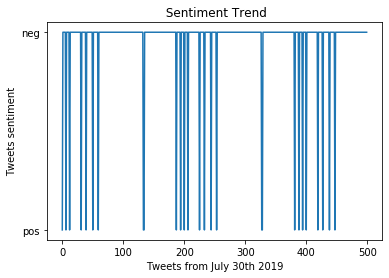

In [751]:
#Line graph for Sentiment vs tweet - hashtags)
import matplotlib.pyplot as plt
plt.plot(range(0,500), polarity_sent_list)
plt.xlabel('Tweets from July 30th 2019')
plt.ylabel('Tweets sentiment')
plt.title(' Sentiment Trend')
plt.show()

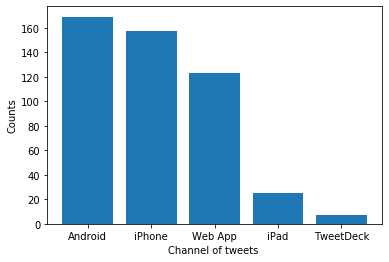

In [730]:
#Bar plot for top 5 channels
import numpy as np
import matplotlib.pyplot as plt
#Values are taken from list -  channel_list
height = [169, 157, 123, 25, 7]
bars = ('Android', 'iPhone', 'Web App', 'iPad', 'TweetDeck')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Channel of tweets ')
plt.ylabel('Counts') 
#plt.title('Top 5 channels used for tweeting')
# Show graphic
plt.show()


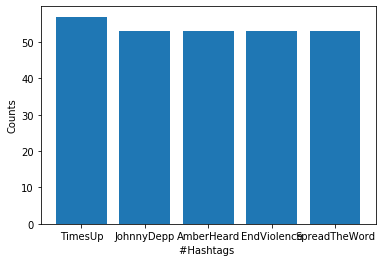

In [743]:
#Bar plot for top 5 associted hashtags
import numpy as np
import matplotlib.pyplot as plt
#Values are taken from list -  hashtag_wordlist
height = [57, 53, 53, 53, 53]
bars = ('TimesUp', 'JohnnyDepp', 'AmberHeard', 'EndViolence', 'SpreadTheWord')
y_pos = np.arange(len(bars))


# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('#Hashtags ')
plt.ylabel('Counts') 
#plt.title('Top 5 associated Hashtags')
# Show graphic
plt.show()


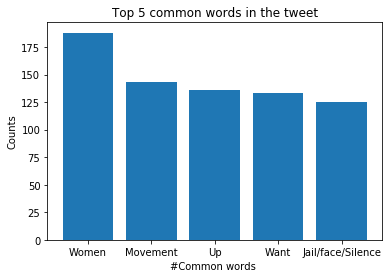

In [752]:
#Bar plot for top 5 common words in the tweet
import numpy as np
import matplotlib.pyplot as plt
#Values are taken from list -  tweet_wordlist
height = [188, 143, 136, 133, 125]
bars = ('Women', 'Movement', 'Up', 'Want', 'Jail/face/Silence')
y_pos = np.arange(len(bars))
   
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('#Common words ')
plt.ylabel('Counts') 
plt.title('Top 5 common words in the tweet')
# Show graphic
plt.show()

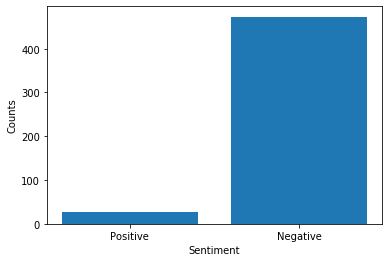

In [749]:
#Bar plot for pos & neg sentiment 
import numpy as np
import matplotlib.pyplot as plt
#Values are taken from list -  polarity_sent_list
height = [27, 473]
bars = ('Positive', 'Negative')
y_pos = np.arange(len(bars))
   
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Sentiment')
plt.ylabel('Counts') 

# Show graphic
plt.show()